<Figure size 1400x1000 with 0 Axes>

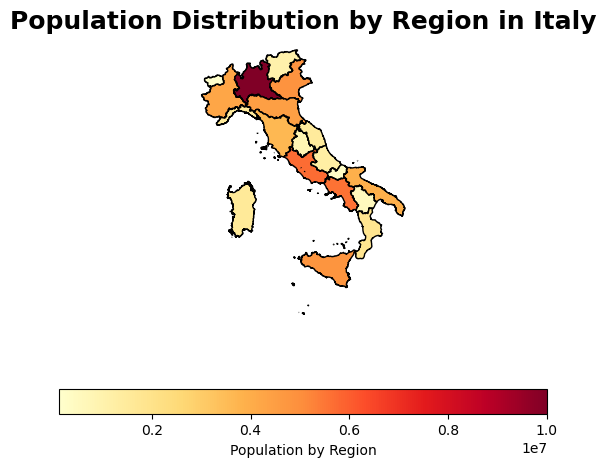

Map saved at /Users/nick/Desktop/USI/I semester/Data Analytics/dataviz portfolio/italy_population_map_final.png


In [28]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# File path for the GeoJSON
italy_geojson_path = "/Users/nick/Desktop/USI/I semester/Data Analytics/dataviz portfolio/geoBoundaries-ITA-ADM2_simplified.geojson"

# Load the GeoJSON file
italy_gdf = gpd.read_file(italy_geojson_path)

# Population data for Italian regions
population_data = {
    'Region': [
        'Lombardy', 'Lazio', 'Campania', 'Veneto', 'Sicily', 'Emilia-Romagna', 'Piedmont',
        'Apulia', 'Tuscany', 'Calabria', 'Sardinia', 'Liguria', 'Marche', 'Abruzzo',
        'Friuli Venezia Giulia', 'Trentino-South Tyrol', 'Umbria', 'Basilicata', 'Molise', 'Aosta Valley'
    ],
    'Population': [
        10012054, 5714745, 5593906, 4852216, 4797359, 4451938, 4251623, 3890661, 3660530,
        1838568, 1570453, 1509140, 1482746, 1269571, 1194616, 1082702, 853068, 533233, 289224, 122877
    ]
}

# Convert population data to a DataFrame
population_df = pd.DataFrame(population_data)

# Standardize names for merging
population_df['Region'] = population_df['Region'].replace({
    'Lombardy': 'Lombardia',
    'Sicily': 'Sicilia',
    'Piedmont': 'Piemonte',
    'Apulia': 'Puglia',
    'Tuscany': 'Toscana',
    'Sardinia': 'Sardegna',
    'Friuli Venezia Giulia': 'Friuli-Venezia Giulia',
    'Trentino-South Tyrol': 'Trentino-Alto Adige',
    'Aosta Valley': "Valle d'Aosta"
    # Add other replacements as necessary
})

# Rename the column in GeoJSON for alignment
italy_gdf = italy_gdf.rename(columns={"shapeName": "Region"})

# Merge GeoJSON data with population data
italy_gdf = italy_gdf.merge(population_df, on="Region", how="left")

# Create the choropleth map
plt.figure(figsize=(14, 10))
italy_gdf.plot(
    column='Population',
    cmap='YlOrRd',  # Use YlOrRd color scheme
    legend=True,
    legend_kwds={
        'label': "Population by Region",
        'orientation': "horizontal",
        'shrink': 0.8
    },
    edgecolor='black'
)

# Add title and customize layout
plt.title("Population Distribution by Region in Italy", fontsize=18, fontweight='bold')
plt.axis('off')

# Save the map
save_path = "/Users/nick/Desktop/USI/I semester/Data Analytics/dataviz portfolio/italy_population_map_final.png"
plt.tight_layout()
plt.savefig(save_path, dpi=300)
plt.show()

print(f"Map saved at {save_path}")